In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, average_precision_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfile_path = r"C:\Users\antho\OneDrive - University College Dublin\ACM20030 1\ALPACA\Dyt-desktop.csv"
tfile_path = r"C:\Users\antho\OneDrive - University College Dublin\ACM20030 1\ALPACA\Dyt-tablet.csv"
# Reading file
dData = pd.read_csv(dfile_path, index_col=0, na_values=['(NA)'])
tData = pd.read_csv(tfile_path, index_col=0, na_values=['(NA)'])
# Display the first few rows
print('Desktop Data:')
print(dData.head())
print('Tablet Data:')
print(tData.head())

Desktop Data:
Empty DataFrame
Columns: []
Index: [Male;No;Yes;7;10;10;0;10;1;0;5;5;0;5;1;0;6;6;0;6;1;0;2;2;0;2;1;0;3;3;0;3;1;0;4;1;3;1;0.25;0.75;5;5;0;5;1;0;4;3;1;3;0.75;0.25;1;0;1;0;0;1;1;1;0;1;1;0;3;1;2;1;0.333333;0.666667;3;3;0;3;1;0;3;3;0;3;1;0;4;4;0;4;1;0;2;2;0;2;1;0;2;2;0;2;1;0;3;3;0;3;1;0;2;2;0;2;1;0;4;3;1;3;0.75;0.25;5;1;4;1;0.2;0.8;3;1;2;1;0.333333;0.666667;4;1;3;1;0.25;0.75;4;3;1;3;0.75;0.25;3;2;1;2;0.666667;0.333333;3;3;0;3;1;0;5;3;2;3;0.6;0.4;9;1;1;1;0.111111;0.111111;6;2;0;2;0.333333;0;4;1;1;1;0.25;0.25;14;1;2;1;0.0714286;0.142857;18;0;0;0;0;0;17;2;0;2;0.117647;0;No, Female;Yes;Yes;13;12;12;0;12;1;0;11;11;0;11;1;0;10;10;0;10;1;0;4;4;0;4;1;0;5;5;0;5;1;0;5;5;0;5;1;0;5;4;1;4;0.8;0.2;6;5;1;5;0.833333;0.166667;5;4;1;4;0.8;0.2;10;10;0;10;1;0;5;4;1;4;0.8;0.2;5;5;0;5;1;0;4;4;0;4;1;0;10;10;0;10;1;0;5;5;0;5;1;0;4;4;0;4;1;0;4;4;0;4;1;0;4;3;1;3;0.75;0.25;8;3;5;3;375;625;3;1;2;1;0.333333;0.666667;3;1;2;1;0.333333;0.666667;9;7;2;7;0.777778;0.222222;6;5;1;5;0.833333;0.166667;3;2;1;2;0.66

In [3]:
def SeparateColumns(dataSetName):
    columns = defaultdict(list)
    with open(dataSetName, 'r') as f:
        reader = csv.reader(f, delimiter=';')
        headers = next(reader)
        column_nums = range(len(headers)) # Do NOT change to xrange
        for row in reader:
            for i in column_nums:
            
                columns[headers[i]].append(row[i])
    # Following line is only necessary if you want a key error for invalid column names
    return dict(columns)

In [4]:
def cleanData(data) :
    for col in data.columns.values:
        data[col] = data[col].astype('string')
    #----------
    for col in data.columns.values:
        data[col] = data[col].astype('float',errors = 'ignore')
    #-----------
    data['Gender']=data.Gender.map({'Male': 1, 'Female': 2})
    data['Dyslexia']=data.Dyslexia.map({'No': 0, 'Yes': 1})
    data['Nativelang']=data.Nativelang.map({'No': 0, 'Yes': 1})
    data['Otherlang']=data.Otherlang.map({'No': 0, 'Yes': 1})

In [5]:
import csv
from collections import defaultdict
columns = SeparateColumns(dfile_path)
dtData=pd.DataFrame.from_dict(columns)
cleanData(dtData)

dtData.head()

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,1,0,1,7.0,10.0,10.0,0.0,10.0,1.0,0.0,...,0.0,0.000000,0.00,17.0,2.0,0.0,2.0,0.117647,0.000000,0
1,2,1,1,13.0,12.0,12.0,0.0,12.0,1.0,0.0,...,4.0,0.114286,0.00,26.0,2.0,2.0,2.0,0.076923,0.076923,1
2,2,0,1,7.0,6.0,6.0,0.0,6.0,1.0,0.0,...,4.0,0.114286,0.00,26.0,1.0,3.0,1.0,0.038462,0.115385,0
3,2,0,1,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00,1.0,0.0,0.0,0.0,0.000000,0.000000,0
4,2,0,1,8.0,4.0,4.0,0.0,4.0,1.0,0.0,...,1.0,25.000000,0.05,26.0,2.0,2.0,2.0,0.076923,0.076923,0


In [6]:
columns = SeparateColumns(tfile_path)
tabData=pd.DataFrame.from_dict(columns)
tabData.replace(["NULL"], np.nan, inplace = True)

cleanData(tabData)

tabData.head()

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,1,1,0,7.0,6.0,6.0,0.0,6.0,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,1,0,7.0,7.0,7.0,0.0,7.0,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,1,0,7.0,6.0,6.0,0.0,6.0,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1,1,0,7.0,5.0,5.0,0.0,5.0,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1,1,0,7.0,8.0,6.0,2.0,8.0,0.75,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
stateOfNUll= tabData.isnull().any()
i = 0
for state in stateOfNUll : 
    if(state):  
        tabData[stateOfNUll.index[i]].fillna(round(tabData[stateOfNUll.index[i]].mean() , 4), inplace=True)
    i = i + 1    

tabData

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,1,1,0,7.0,6.0,6.0,0.0,6.0,1.00,0.00,...,46.8333,0.386300,0.5439,52.51,2.7851,7.9719,52.51,0.970900,2.225400,0
1,2,1,0,7.0,7.0,7.0,0.0,7.0,1.00,0.00,...,46.8333,0.386300,0.5439,52.51,2.7851,7.9719,52.51,0.970900,2.225400,0
2,2,1,0,7.0,6.0,6.0,0.0,6.0,1.00,0.00,...,46.8333,0.386300,0.5439,52.51,2.7851,7.9719,52.51,0.970900,2.225400,0
3,1,1,0,7.0,5.0,5.0,0.0,5.0,1.00,0.00,...,46.8333,0.386300,0.5439,52.51,2.7851,7.9719,52.51,0.970900,2.225400,0
4,1,1,0,7.0,8.0,6.0,2.0,8.0,0.75,0.25,...,46.8333,0.386300,0.5439,52.51,2.7851,7.9719,52.51,0.970900,2.225400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,1,1,0,17.0,13.0,13.0,0.0,13.0,1.00,0.00,...,35.0000,0.114286,0.0000,26.00,4.0000,0.0000,26.00,0.153846,0.000000,0
1391,2,1,1,17.0,9.0,9.0,0.0,9.0,1.00,0.00,...,35.0000,0.114286,0.0000,26.00,4.0000,0.0000,26.00,0.153846,0.000000,0
1392,1,1,1,17.0,10.0,10.0,0.0,10.0,1.00,0.00,...,35.0000,0.114286,0.0000,27.00,3.0000,2.0000,27.00,0.111111,0.074074,0
1393,2,1,1,17.0,11.0,11.0,0.0,11.0,1.00,0.00,...,35.0000,0.114286,0.0000,26.00,4.0000,0.0000,26.00,0.153846,0.000000,0


In [8]:
cols_with_missing = [col for col in tabData.columns if tabData[col].isnull().any()]

# Drop columns desktop data
reduced_desktopData = dtData.drop(cols_with_missing, axis=1)

# Drop columns tablet data
reduced_tabletData = tabData.drop(cols_with_missing, axis=1)

In [9]:
commonalityColumns = ['Gender','Nativelang','Otherlang','Age' , 'Dyslexia']
for i in  range(30):
    if((i>=0 and i<12) or (i>=13 and i<17) or i==21 or i==22 or i==29):
        commonalityColumns.append('Clicks'+str(i+1))
        commonalityColumns.append('Hits'+str(i+1))
        commonalityColumns.append('Misses'+str(i+1))
        commonalityColumns.append('Score'+str(i+1))
        commonalityColumns.append('Accuracy'+str(i+1))
        commonalityColumns.append('Missrate'+str(i+1))
    
reduced_desktopData=reduced_desktopData.loc[:,commonalityColumns]
reduced_tabletData=reduced_tabletData.loc[:,commonalityColumns]

In [12]:
y=reduced_desktopData['Dyslexia']
X=reduced_desktopData.loc[:, reduced_desktopData.columns != 'Dyslexia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in ve

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in ve

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in ve

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in ve

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\P

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...), 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'pca__n_components': 4}
Best cross-validation score: 0.6157706093189963
Test Accuracy: 0.6803840877914952
Cla

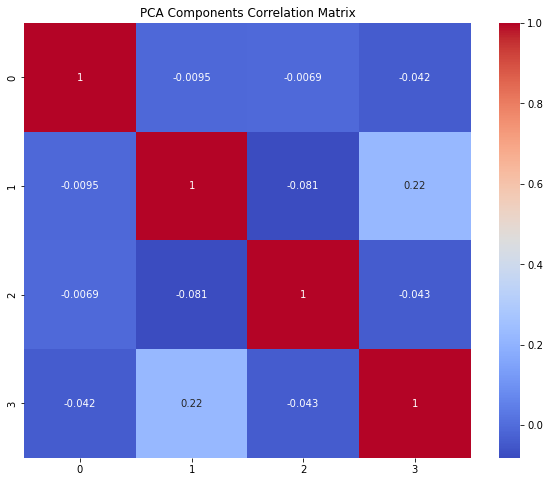

ValueError: Feature shape mismatch, expected: 4, got 118

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with resampling, scaling, normalization, PCA, and placeholder for the classifier
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),  # Balance the dataset using SMOTE
    ('scaler', StandardScaler()),       # Standardize features by removing the mean and scaling to unit variance
    ('normalizer', Normalizer()),       # Normalize samples individually to unit norm
    ('pca', PCA()),                     # PCA for dimensionality reduction
    ('classifier', RandomForestClassifier(random_state=42))  # Placeholder
])

# Define the parameter grid to include different classifiers and their parameters
param_grid = [
    {
        'pca__n_components': [2, 3, 4],
        'classifier': [BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42))],
        'classifier__n_estimators': [10, 50, 100]
    },
    {
        'pca__n_components': [2, 3, 4],
        'classifier': [BaggingClassifier(base_estimator=KNeighborsClassifier())],
        'classifier__n_estimators': [10, 50, 100]
    },
    {
        'pca__n_components': [2, 3, 4],
        'classifier': [AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42))],
        'classifier__n_estimators': [50, 100, 200]
    },
    {
        'pca__n_components': [2, 3, 4],
        'classifier': [XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    },
    {
        'pca__n_components': [2, 3, 4],
        'classifier': [Ridge(random_state=42)],
        'classifier__alpha': [0.01, 0.1, 1.0, 10.0]
    }
]

# Create the GridSearchCV object with recall as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Predict on the test set using the best estimator
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Extract feature importance from the best estimator if it has the attribute
if hasattr(best_pipeline.named_steps['classifier'], 'feature_importances_'):
    feature_importance = best_pipeline.named_steps['classifier'].feature_importances_
    print(f"Feature importance: {feature_importance}")

# Analyze cross-correlation
X_scaled_normalized = best_pipeline.named_steps['normalizer'].transform(best_pipeline.named_steps['scaler'].transform(X))
X_pca = best_pipeline.named_steps['pca'].transform(X_scaled_normalized)
df_pca = pd.DataFrame(X_pca)

correlation_matrix = df_pca.corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('PCA Components Correlation Matrix')
plt.show()

# Precision-Recall Curve and Average Precision Score
if hasattr(best_pipeline.named_steps['classifier'], "decision_function"):
    y_score = best_pipeline.named_steps['classifier'].decision_function(X_test)
else:
    y_score = best_pipeline.named_steps['classifier'].predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_pipeline, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in ve

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in ve

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in ve

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in ve

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:07:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\P

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

Best parameters: {'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...), 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'pca__n_components': 4}
Best cross-validation score: 0.6189964157706094
Test Accuracy: 0.6748971193415638
Cla

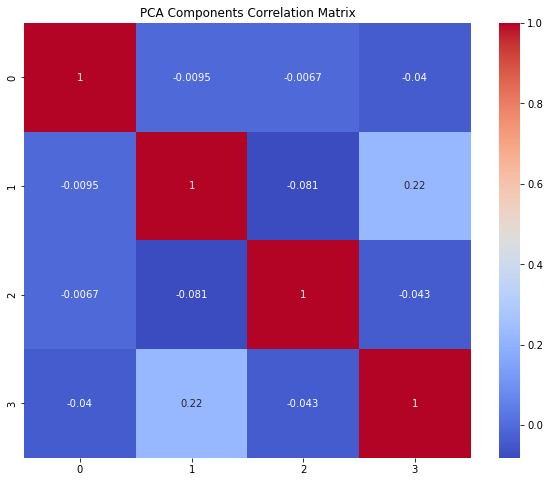

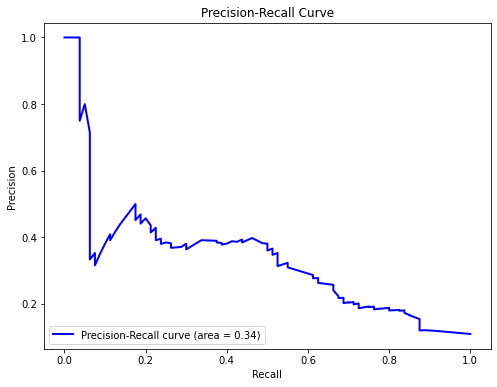

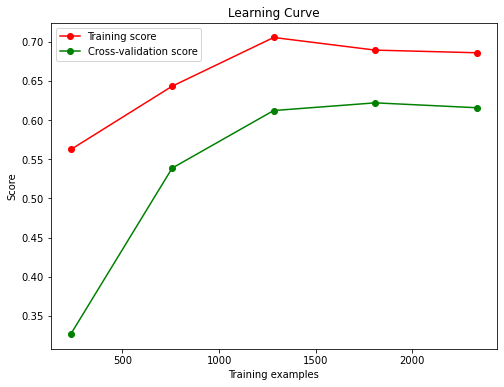

In [17]:
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),  # Balance the dataset using SMOTE
    ('scaler', StandardScaler()),       # Standardize features by removing the mean and scaling to unit variance
    ('normalizer', Normalizer()),       # Normalize samples individually to unit norm
    ('pca', PCA()),                     # PCA for dimensionality reduction
    ('classifier', RandomForestClassifier(random_state=42))  # Placeholder
])

# Define the parameter grid to include different classifiers and their parameters
param_grid = [
    {
        'pca__n_components': [2, 3, 4],
        'classifier': [BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42))],
        'classifier__n_estimators': [10, 50, 100]
    },
    {
        'pca__n_components': [2, 3, 4],
        'classifier': [BaggingClassifier(base_estimator=KNeighborsClassifier())],
        'classifier__n_estimators': [10, 50, 100]
    },
    {
        'pca__n_components': [2, 3, 4],
        'classifier': [AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42))],
        'classifier__n_estimators': [50, 100, 200]
    },
    {
        'pca__n_components': [2, 3, 4],
        'classifier': [XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    },
    {
        'pca__n_components': [2, 3, 4],
        'classifier': [Ridge(random_state=42)],
        'classifier__alpha': [0.01, 0.1, 1.0, 10.0]
    }
]

# Create the GridSearchCV object with recall as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Predict on the test set using the best estimator
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Extract feature importance from the best estimator if it has the attribute
if hasattr(best_pipeline.named_steps['classifier'], 'feature_importances_'):
    feature_importance = best_pipeline.named_steps['classifier'].feature_importances_
    print(f"Feature importance: {feature_importance}")

# Analyze cross-correlation
X_scaled_normalized = best_pipeline.named_steps['normalizer'].transform(best_pipeline.named_steps['scaler'].transform(X))
X_pca = best_pipeline.named_steps['pca'].transform(X_scaled_normalized)
df_pca = pd.DataFrame(X_pca)

correlation_matrix = df_pca.corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('PCA Components Correlation Matrix')
plt.show()

# Precision-Recall Curve and Average Precision Score
y_score = best_pipeline.decision_function(X_test) if hasattr(best_pipeline, 'decision_function') else best_pipeline.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_pipeline, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

In [18]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, average_precision_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_pipeline_and_param_grid():
    # Define the pipeline with resampling, scaling, normalization, PCA, and placeholder for the classifier
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),  # Balance the dataset using SMOTE
        ('scaler', StandardScaler()),       # Standardize features by removing the mean and scaling to unit variance
        ('normalizer', Normalizer()),       # Normalize samples individually to unit norm
        ('pca', PCA()),                     # PCA for dimensionality reduction
        ('classifier', RandomForestClassifier(random_state=42))  # Placeholder
    ])

    # Define the parameter grid to include different classifiers and their parameters
    param_grid = [
        {
            'pca__n_components': [2, 3, 4],
            'classifier': [BaggingClassifier(estimator=RandomForestClassifier(random_state=42))],
            'classifier__n_estimators': [10, 50, 100]
        },
        {
            'pca__n_components': [2, 3, 4],
            'classifier': [BaggingClassifier(estimator=KNeighborsClassifier())],
            'classifier__n_estimators': [10, 50, 100]
        },
        {
            'pca__n_components': [2, 3, 4],
            'classifier': [AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42))],
            'classifier__n_estimators': [50, 100, 200]
        },
        {
            'pca__n_components': [2, 3, 4],
            'classifier': [XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 7]
        },
        {
            'pca__n_components': [2, 3, 4],
            'classifier': [Ridge(random_state=42)],
            'classifier__alpha': [0.01, 0.1, 1.0, 10.0]
        }
    ]
    return pipeline, param_grid

def evaluate_model(grid_search, X_test, y_test):
    # Predict on the test set using the best estimator
    best_pipeline = grid_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Test Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    # Extract feature importance from the best estimator if it has the attribute
    if hasattr(best_pipeline.named_steps['classifier'], 'feature_importances_'):
        feature_importance = best_pipeline.named_steps['classifier'].feature_importances_
        print(f"Feature importance: {feature_importance}")

    return best_pipeline

def plot_correlation_matrix(best_pipeline, X):
    # Analyze cross-correlation
    X_scaled_normalized = best_pipeline.named_steps['normalizer'].transform(best_pipeline.named_steps['scaler'].transform(X))
    X_pca = best_pipeline.named_steps['pca'].transform(X_scaled_normalized)
    df_pca = pd.DataFrame(X_pca)

    correlation_matrix = df_pca.corr()
    print("Correlation matrix:")
    print(correlation_matrix)

    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('PCA Components Correlation Matrix')
    plt.show()

def plot_precision_recall_curve(best_pipeline, X_test, y_test):
    # Precision-Recall Curve and Average Precision Score
    y_score = best_pipeline.decision_function(X_test) if hasattr(best_pipeline.named_steps['classifier'], 'decision_function') else best_pipeline.named_steps['classifier'].predict_proba(X_test)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, y_score)
    average_precision = average_precision_score(y_test, y_score)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

def plot_learning_curve(best_pipeline, X_train, y_train):
    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(best_pipeline, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.show()

def main():
    pipeline, param_grid = create_pipeline_and_param_grid()

    # Create the GridSearchCV object with recall as the scoring metric
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', verbose=1)

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the corresponding score
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_}")

    best_pipeline = evaluate_model(grid_search, X_test, y_test)

    plot_correlation_matrix(best_pipeline, np.vstack((X_train, X_test)))
    plot_precision_recall_curve(best_pipeline, X_test, y_test)
    plot_learning_curve(best_pipeline, X_train, y_train)

if __name__ == "__main__":
    main()


Fitting 5 folds for each of 120 candidates, totalling 600 fits


KeyboardInterrupt: 

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:30:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:30:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:30:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:34:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\anaconda3\lib\site-packages\

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File

C:\Users\antho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters: {'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...), 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'pca__n_components': 2}
Best cross-validation score: 1.0
Test recall: 1.0
Classification Report:              

C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antho\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


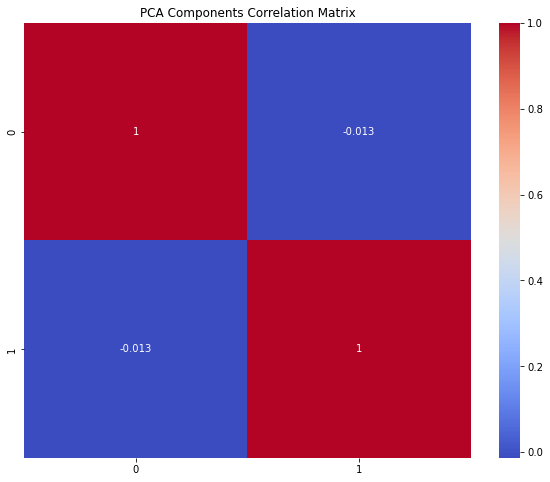

ValueError: Feature shape mismatch, expected: 2, got 118

In [13]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, average_precision_score, recall_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_pipeline_and_param_grid():
    # Define the pipeline with resampling, normalization, PCA, and classifier
    pipeline = ImbPipeline([
        ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Balance the dataset
        ('normalizer', Normalizer()),       # Normalize samples individually to unit norm
        ('pca', PCA()),                     # PCA for dimensionality reduction
        ('classifier', RandomForestClassifier(random_state=42))  # Placeholder
    ])

    # Define the parameter grid
    param_grid = [
        {
            'pca__n_components': [2, 3, 4],
            'classifier': [BaggingClassifier(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'))],
            'classifier__n_estimators': [10, 50, 100]
        },
        {
            'pca__n_components': [2, 3, 4],
            'classifier': [BaggingClassifier(estimator=KNeighborsClassifier())],
            'classifier__n_estimators': [10, 50, 100]
        },
        {
            'pca__n_components': [2, 3, 4],
            'classifier': [AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'))],
            'classifier__n_estimators': [50, 100, 200]
        },
        {
            'pca__n_components': [2, 3, 4],
            'classifier': [XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=5)],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 7]
        },
        {
            'pca__n_components': [2, 3, 4],
            'classifier': [Ridge(random_state=42)],
            'classifier__alpha': [0.01, 0.1, 1.0, 10.0]
        }
    ]
    return pipeline, param_grid

def evaluate_model(grid_search, X_test, y_test):
    # Predict on the test set using the best estimator
    best_pipeline = grid_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)

    # Evaluate the model
    recall = recall_score(y_test, y_pred, average='binary')
    report = classification_report(y_test, y_pred)
    print(f"Test recall: {recall}")
    print("Classification Report:", report)

    # Extract feature importance from the best estimator if it has the attribute
    if hasattr(best_pipeline.named_steps['classifier'], 'feature_importances_'):
        feature_importance = best_pipeline.named_steps['classifier'].feature_importances_
        print(f"Feature importance: {feature_importance}")

    return best_pipeline

def plot_correlation_matrix(best_pipeline, X):
    # Analyze cross-correlation
    X_normalized = best_pipeline.named_steps['normalizer'].transform(X)
    X_pca = best_pipeline.named_steps['pca'].transform(X_normalized)
    df_pca = pd.DataFrame(X_pca)

    correlation_matrix = df_pca.corr()
    print("Correlation matrix:")
    print(correlation_matrix)

    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('PCA Components Correlation Matrix')
    plt.show()

def plot_precision_recall_curve(best_pipeline, X_test, y_test):
    # Precision-Recall Curve and Average Precision Score
    y_score = best_pipeline.decision_function(X_test) if hasattr(best_pipeline.named_steps['classifier'], 'decision_function') else best_pipeline.named_steps['classifier'].predict_proba(X_test)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, y_score)
    average_precision = average_precision_score(y_test, y_score)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

def plot_learning_curve(best_pipeline, X_train, y_train):
    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(best_pipeline, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.show()

def main():
    pipeline, param_grid = create_pipeline_and_param_grid()

    # Create the GridSearchCV object with recall as the scoring metric
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', verbose=1)

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the corresponding score
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_}")

    best_pipeline = evaluate_model(grid_search, X_test, y_test)

    plot_correlation_matrix(best_pipeline, np.vstack((X_train, X_test)))
    plot_precision_recall_curve(best_pipeline, X_test, y_test)
    plot_learning_curve(best_pipeline, X_train, y_train)

if __name__ == "__main__":
    main()

In [20]:
np.savetxt("X_data.csv",X,delimiter=",")
np.savetxt("y_data.csv",y,delimiter=",")